In [1]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
sys.path

['C:\\Users\\Mechano_2',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Users\\Mechano_2\\PycharmProjects\\pro']

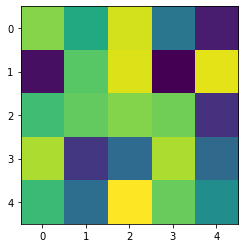

In [79]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import skimage.measure

""":parameter"""
image = np.random.randint(0,255,(5,5)).astype('uint8')
plt.imshow(image)

In [87]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def pool2d(A, kernel_size, stride, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    if pool_mode == 'min':
        value = A.max()
    else:
        value = 0
    # Padding
    A = np.pad(A, kernel_size-2 , mode='constant', constant_values=value)
    print(A)
    # Window view of A
    output_shape = ((A.shape[0] - kernel_size)//stride + 1,
                    (A.shape[1] - kernel_size)//stride + 1)
    kernel_size = (kernel_size, kernel_size)
    A_w = as_strided(A, shape = output_shape + kernel_size,
                        strides = (stride*A.strides[0],
                                   stride*A.strides[1]) + A.strides)
    A_w = A_w.reshape(-1, *kernel_size)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(1,2)).reshape(output_shape)
    elif pool_mode == 'avg':
        return A_w.mean(axis=(1,2)).reshape(output_shape)
    elif pool_mode == 'min':
        return A_w.min(axis=(1,2)).reshape(output_shape)

b = pool2d(image, kernel_size=3,stride=1, pool_mode='min')
print(b)

[[226 226 226 226 226 226 226]
 [226 185 138 211  90  20 226]
 [226  11 168 214   2 217 226]
 [226 157 172 184 177  34 226]
 [226 198  38  80 198  79 226]
 [226 155  83 226 174 112 226]
 [226 226 226 226 226 226 226]]
[[11 11  2  2  2]
 [11 11  2  2  2]
 [11 11  2  2  2]
 [38 38 38 34 34]
 [38 38 38 79 79]]
